In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Visualize the dataset

Target labels:  [6 1 6 4 8 1 2 9 0 9]


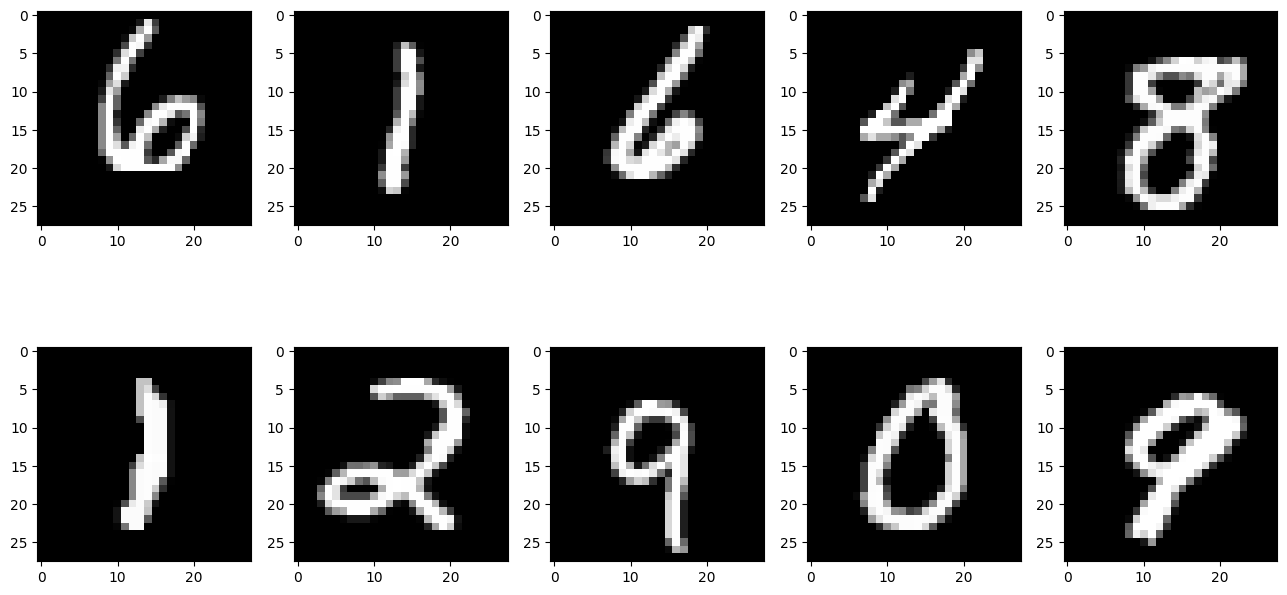

In [14]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [20]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [17]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [19]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2909 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1296 - accuracy: 0.9605
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0936 - accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0759 - accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0625 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0523 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0452 - accuracy: 0.9852
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0400 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9881
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

Plot the loss and accuracy graphs

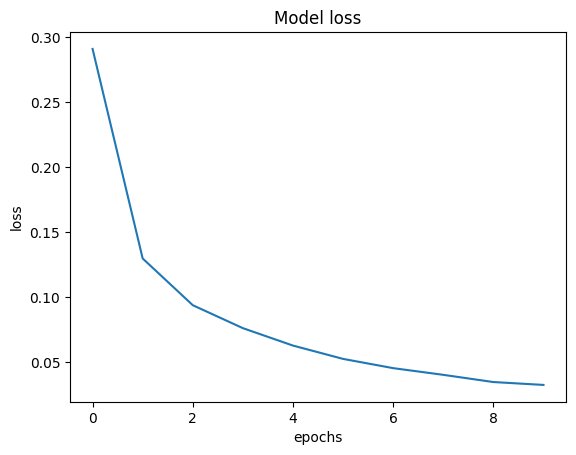

In [23]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

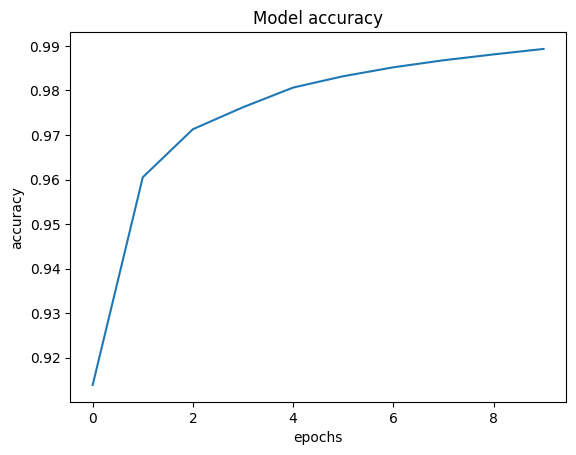

In [24]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [31]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.1096 - accuracy: 0.9697
Loss of the Test dataset is: 0.1096164658665657
Accuracy of the test dataset is: 0.9696999788284302


Save the model weights

In [10]:
model.save_weights('MNIST_WEIGHTS_V1.h5')